In [1]:
# Load libraries
import math
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# Set the font family and sizes to use for matplotlib figures
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

In [74]:
# Set the parameters.
g = 9.81 # gravitational acceleration (m.s^{-2})
vt = 4.9 # trim velocity (m.s)
CD = 1.0 / 5 # drag coefficient
CL = 1.0 # lift coefficient

# Set initial conditions
v0 = vt # start at the trim velocity
theta0 = 0.0 # trajectory angle
x0 = 0.0 # horizontal position
y0 = 10.0 # vertical position (altitude)

In [75]:
def rhs_phugoid(u, CL, CD, g, vt):
    v, theta, x, y = u
    rhs = np.array([-g * math.sin(theta) - CD /CL * g / vt**2 * v**2,
                    -g * math.cos(theta) / v + g / vt**2 * v,
                    v * math.cos(theta),
                    v * math.sin(theta)])
    return rhs

In [76]:
def euler_step(u, f, dt, *args):
    u_new = u + dt * f(u, *args)
    return u_new

In [77]:
T = 100.0 # length of time interval
dt = 0.1 # time-step size
N = int(T / dt) + 1 # number of time steps

print('Number of steps: {}'.format(N))
# Create an array to store the solution at each time step.
u = np.empty((N, 4))

# Set the initial conditions.
u[0] = np.array([v0, theta0, x0, y0])

print("u's shape: {}".format(u.shape))

# Time integration using Euler's method.
for n in range(N - 1):
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

Number of steps: 1001
u's shape: (1001, 4)


In [78]:
# Get the paper airplane's position over the time.
x = u[:, 2]
y = u[:, 3]

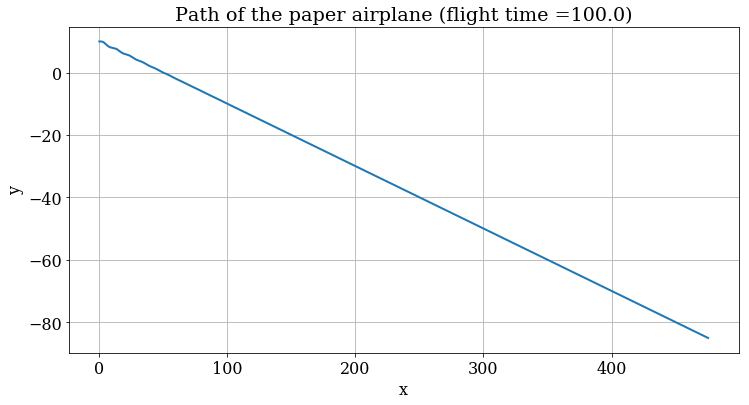

In [90]:
# Plot the flight trajectory
plt.figure(figsize=(12.0, 6.0))
plt.title('Path of the paper airplane (flight time ={})'.format(T))
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim()
#plt.xlim(0, 500)
plt.grid()
plt.plot(x, y, color='C0', linestyle='-', linewidth=2)